In [1]:
import numpy as np
import os.path as osp

from tf_lab.iclr.helper import load_multiple_version_of_pcs
from tf_lab.data_sets.shape_net import snc_category_to_synth_id
from general_tools.in_out.basics import create_dir
from geo_tool import Point_Cloud

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [11]:
class_name = raw_input('Give me the class type.\n').lower()
# syn_id = snc_category_to_synth_id()[class_name]
# top_out_dir = '/orions4-zfs/projects/optas/DATA/OUT/iclr/evaluations/gt_data'
top_out_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/iclr/evaluations/gt_data'
create_dir(top_out_dir)

Give me the class type.
achlioptas_snc_5_medium_size


In [25]:
in_data = load_multiple_version_of_pcs('uniform_one', syn_id, n_classes=1)

405 pclouds were loaded. They belong in 1 shape-classes.
3438 pclouds were loaded. They belong in 1 shape-classes.
202 pclouds were loaded. They belong in 1 shape-classes.


In [26]:
for key in in_data:
    print key
    out_file = osp.join(top_out_dir, class_name + '_' + key)
    np.savez(out_file, in_data[key].point_clouds)

test
train
val


(405, 2048, 3)


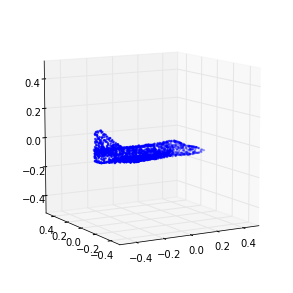

(3438, 2048, 3)


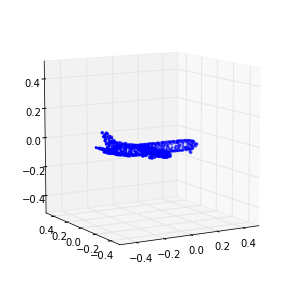

(202, 2048, 3)


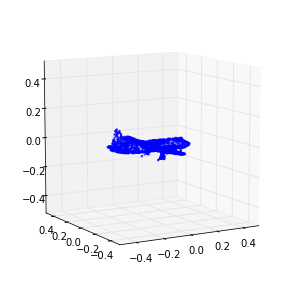

In [27]:
for key in in_data:
    out_file = osp.join(top_out_dir, syn_id + '_' + key)
    sample_data = np.load(out_file + '.npz')
    sample_data = sample_data[sample_data.keys()[0]]
    print sample_data.shape
    Point_Cloud(sample_data[0]).plot()